<a href="https://colab.research.google.com/github/pockypoem/orbit-ai/blob/main/Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Menggunakan Neural Network**

**1. Import Library**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load Dataset**

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**3. Data Exploratory**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

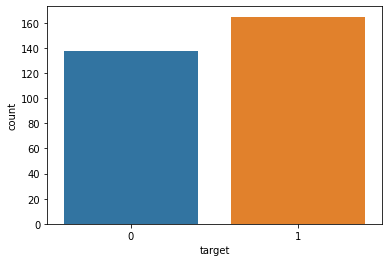

In [6]:
y = dataset['target']
sns.countplot(y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

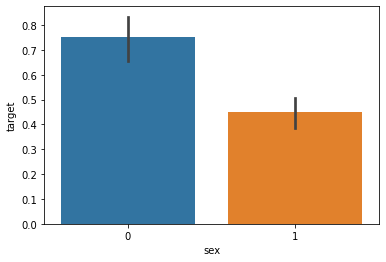

In [7]:
sns.barplot(dataset['sex'], y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='target'>

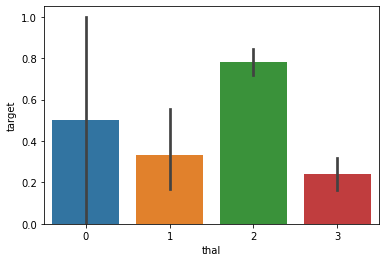

In [8]:
sns.barplot(dataset['thal'], y)

**4. Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['target'], axis=1).values
y = dataset['target']

In [10]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**5. Model Fitting - Machine Learning**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [23]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

**6. Metrics Evaluation - ML**

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [24]:
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [36]:
y_pred_knn_train

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [25]:
print("Accuracy (train) Logistic Regression ", accuracy_score(y_train, y_pred_lr_train))
print("Accuracy (test) Logistic Regression ", accuracy_score(y_test, y_pred_lr_test))

print("Accuracy (train) KNN ", accuracy_score(y_train, y_pred_knn_train))
print("Accuracy (test) KNN ", accuracy_score(y_test, y_pred_knn_test))

Accuracy (train) Logistic Regression  0.859504132231405
Accuracy (test) Logistic Regression  0.8524590163934426
Accuracy (train) KNN  0.7768595041322314
Accuracy (test) KNN  0.6557377049180327


Berdasarkan evaluasi logistic regression, Hasil akurasi dari prediksi data latih dan data uji hampir sama di kisaran 0.85 hanya selisih sedikit saja.

Lalu berdasarkan hasil evaluasi KNN, dapat disimpulkan bahwa klasifikasi menggunakan Logistic Regression memiliki skor akurasi yang lebih tinggi dari KNN. Dan pada KNN sendiri pun akurasi pada data latih lebih tinggi daripada data testing 77.6% > 65.5% sehingga dapat dikatakan bahwa model knn mengalami overfitting.

**7. Model Fitting - Neural Network**

In [26]:
from keras.models import Sequential # Sequential berarti proses fully connected itu dilakuakn secara terurut
from keras.layers import Dense # istilah hidden layer itu dinamakans sebagai Dense

In [27]:
print("input dimension: ", X.shape)
print("output dimension: ", y.shape)

input dimension:  (303, 13)
output dimension:  (303,)


**Build Model with NN**

## Percobaan Pertama: Arsitektur NN dengan 2 Layer

Accuracy (train) Neural Network  0.6900826446280992 <br>
Accuracy (test) Neural Network  0.7377049180327869

In [28]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13)) # untuk setiap Dense, common activation = Relu
model.add(Dense(1, activation='sigmoid')) #untuk setiap output classification: sigmoid (binary) / softmax (multi-binary)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                154       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


**Optimizer Model**

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [46]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6405
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.6777
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6694
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6570
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6612
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6653
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6243 - accuracy: 0.6694
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6529
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.6736
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6188 - accuracy: 0.6694
Epoch 11/300
8/8 [===========

In [33]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [44]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test= [round(x[0]) for x in y_pred_nn_test]

In [43]:
rounded_y_train

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [37]:
y_pred_nn_train[y_pred_nn_train > 0.5] = 1
y_pred_nn_train[y_pred_nn_train < 0.5] = 0

In [38]:
y_pred_nn_train

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [45]:
print("Accuracy (train) Neural Network ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network  0.6900826446280992
Accuracy (test) Neural Network  0.7377049180327869


**Plotting Hasil Evaluasi**

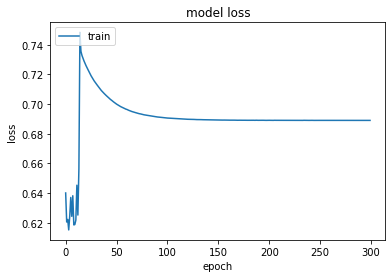

In [49]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

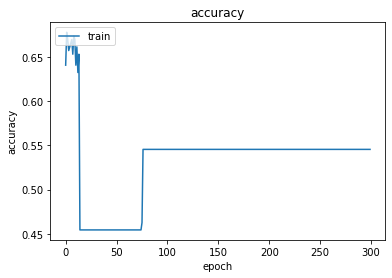

In [50]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Percobaan Kedua: Arsitektur NN dengan 3 Layer

Accuracy (train) Neural Network  0.6776859504132231 <br>
Accuracy (test) Neural Network  0.7049180327868853

In [51]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13)) # untuk setiap Dense, common activation = Relu
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #untuk setiap output classification: sigmoid (binary) / softmax (multi-binary)

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                154       
                                                                 
 dense_3 (Dense)             (None, 5)                 60        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 1.5894 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5702
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.5702
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6074
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6322
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6116
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6322
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6281
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6157
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6281
Epoch 11/300
8/8 [===========

In [55]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [56]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test= [round(x[0]) for x in y_pred_nn_test]

In [57]:
print("Accuracy (train) Neural Network ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network  0.6776859504132231
Accuracy (test) Neural Network  0.7049180327868853


## Percobaan Ketiga: Arsitektur NN dengan 4 Layer

**Optimizer = Stochastic Gradient Descent** <br>
Accuracy (train) Neural Network  0.5454545454545454 <br>
Accuracy (test) Neural Network  0.5409836065573771

<br>

**Optimizer = Adam** <br>
Accuracy (train) Neural Network  0.5454545454545454 <br>
Accuracy (test) Neural Network  0.5409836065573771

In [58]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=13)) # untuk setiap Dense, common activation = Relu
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                224       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 4ms/step - loss: 0.6891 - accuracy: 0.5455
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5455
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5455
Epoch 11/300
8/8 [===========

In [70]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [71]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test= [round(x[0]) for x in y_pred_nn_test]

In [72]:
print("Accuracy (train) Neural Network ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network  0.5454545454545454
Accuracy (test) Neural Network  0.5409836065573771


## Percobaan Keempat: Arsitektur NN dengan Multi Layer Perceptron

Accuracy (train) Neural Network  0.731404958677686 <br>
Accuracy (test) Neural Network  0.7540983606557377 

In [98]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [110]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 0s 36ms/step - loss: 0.3479 - accuracy: 0.8554 - val_loss: 0.3874 - val_accuracy: 0.8197
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3327 - accuracy: 0.8636 - val_loss: 0.5186 - val_accuracy: 0.7869
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3591 - accuracy: 0.8264 - val_loss: 0.6937 - val_accuracy: 0.6721
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4189 - accuracy: 0.8306 - val_loss: 0.5137 - val_accuracy: 0.7705
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3911 - accuracy: 0.8471 - val_loss: 0.4448 - val_accuracy: 0.8197
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3838 - accuracy: 0.8140 - val_loss: 0.5147 - val_accuracy: 0.8033
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3986 - accuracy: 0.8223 - val_loss: 0.4142 - val_accuracy: 0.8033
Epoch 8/100
8/8 [=======

In [111]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [112]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test= [round(x[0]) for x in y_pred_nn_test]

In [113]:
print("Accuracy (train) Neural Network ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network  0.731404958677686
Accuracy (test) Neural Network  0.7540983606557377


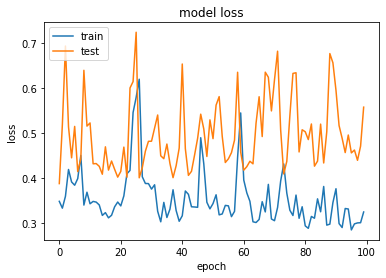

In [114]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

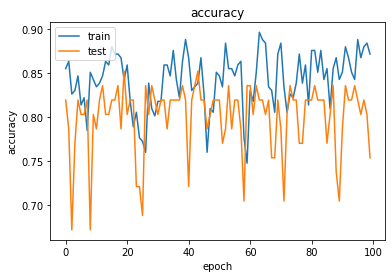

In [115]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Percobaan Kelima: Arsitektur NN dengan CNN

In [116]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [117]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=140, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

Epoch 1/140
8/8 [==============================] - 0s 27ms/step - loss: 0.5564 - accuracy: 0.6901 - val_loss: 0.5718 - val_accuracy: 0.6557
Epoch 2/140
8/8 [==============================] - 0s 15ms/step - loss: 0.6045 - accuracy: 0.6777 - val_loss: 0.5027 - val_accuracy: 0.7541
Epoch 3/140
8/8 [==============================] - 0s 20ms/step - loss: 0.5674 - accuracy: 0.7397 - val_loss: 0.4948 - val_accuracy: 0.7869
Epoch 4/140
8/8 [==============================] - 0s 18ms/step - loss: 0.5581 - accuracy: 0.6983 - val_loss: 0.4846 - val_accuracy: 0.7705
Epoch 5/140
8/8 [==============================] - 0s 15ms/step - loss: 0.5583 - accuracy: 0.6942 - val_loss: 0.4769 - val_accuracy: 0.7705
Epoch 6/140
8/8 [==============================] - 0s 15ms/step - loss: 0.5482 - accuracy: 0.6777 - val_loss: 0.5132 - val_accuracy: 0.7705
Epoch 7/140
8/8 [==============================] - 0s 8ms/step - loss: 0.5835 - accuracy: 0.6942 - val_loss: 0.4870 - val_accuracy: 0.7869
Epoch 8/140
8/8 [====

In [127]:
y_pred_nn_train = model.predict(X_train)
y_pred_nn_test = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [128]:
rounded_y_train = [round(x[0]) for x in y_pred_nn_train]
rounded_y_test= [round(x[0]) for x in y_pred_nn_test]

In [129]:
print("Accuracy (train) Neural Network ", accuracy_score(y_train, rounded_y_train))
print("Accuracy (test) Neural Network ", accuracy_score(y_test, rounded_y_test))

Accuracy (train) Neural Network  0.7479338842975206
Accuracy (test) Neural Network  0.7049180327868853


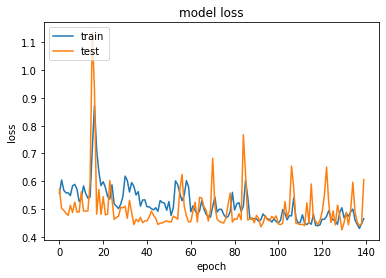

In [130]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

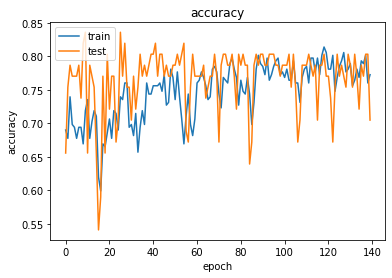

In [131]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Kesimpulan

Berdasarkan kelima percobaan yang telah saya lakukan, dapat saya simpulkan bahwa arsitektur terbaik untuk kasus Heart Disease adalah **Arsitektur Neural Network CNN**